
# Random Over-sampling
Machine Learning with Imbalanced Data - Course

Random over-sampling consists in extracting at random samples from the minority class, until they reach a certain proportion compared to the majority class, typically 50:50, or in other words, a balancing ratio of 1.

In Random over-sampling, we extract samples from the minority class at random, with replacement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data
We will create 2 classes, one majority and one minority, clearly separated to facilitate the demo.

In [2]:
# configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pd formats
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced X set
X = pd.concat([
    X[y==0],
    X[y==1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
X.head()

,varA,varB
0,0.118010,2.274297
1,0.893412,0.023442
4,-3.072546,1.543779
7,-1.261940,0.223424
11,-0.440467,-1.211846


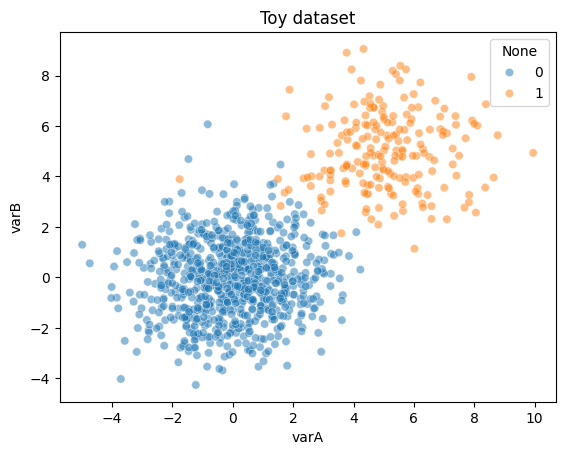

In [4]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling
RandomOverSampler

Selects samples from the minority class at random, with replacement, until we have as many observations as those in the majority class (or any other balancing ratio we wish).

In [5]:
ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
)

X_res, y_res = ros.fit_resample(X, y)

In [6]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# size of oversampled data
X_res.shape, y_res.shape

((1600, 2), (1600,))

In [8]:
# number of minority class obs
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

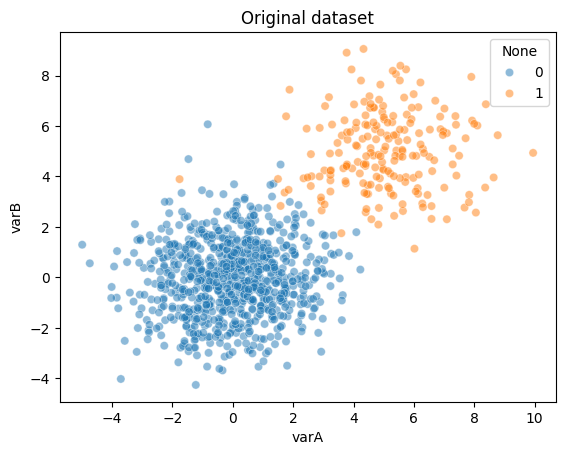

In [9]:
# plot original data
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Original dataset')
plt.show()

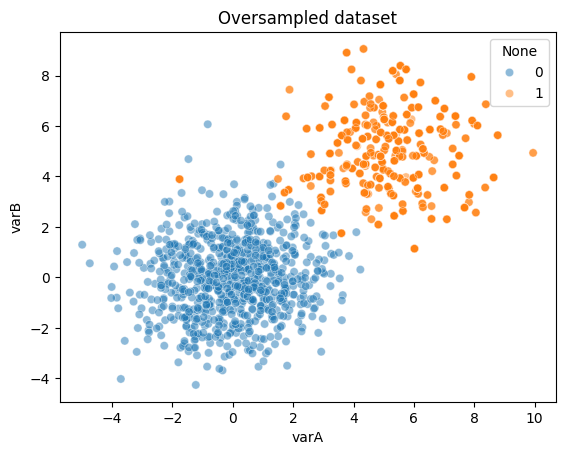

In [10]:
# plot of resampled data
sns.scatterplot(
    data=X_res, x='varA', y='varB', hue=y_res, alpha=0.5,
)

plt.title('Oversampled dataset')
plt.show()

The reason why we do not see as if there were more observations from the minority, is because they are identical to the other ones, so they are plotted on top. We notice there are more, because the orange colour is darker.

## Multiclass
### Create data

In [11]:
# create some toy data
# configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (-1, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pd formats
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced X set
X = pd.concat([
    X[y==0],
    X[y==1].sample(100, random_state=42),
    X[y==2].sample(100, random_state=42),
], axis=0)

y = y.loc[X.index]

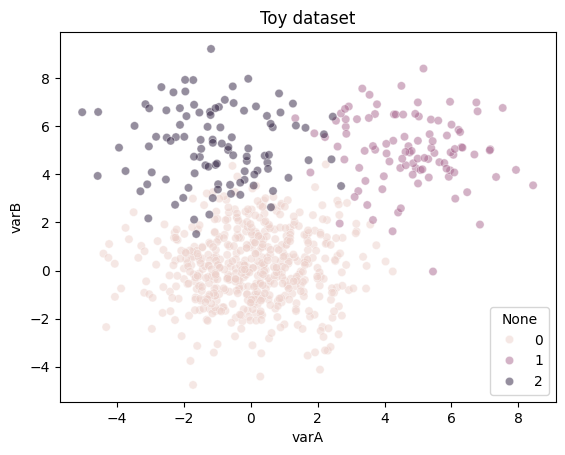

In [12]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5,
)

plt.title('Toy dataset')
plt.show()

In [13]:
y.value_counts()

0    534
1    100
2    100
Name: count, dtype: int64

### Oversampling

In [19]:
# option 1: oversample all but majority class
ros = RandomOverSampler(
    sampling_strategy='auto',   # samples all but majority class
    random_state=0,
)

X_res, y_res = ros.fit_resample(X, y)

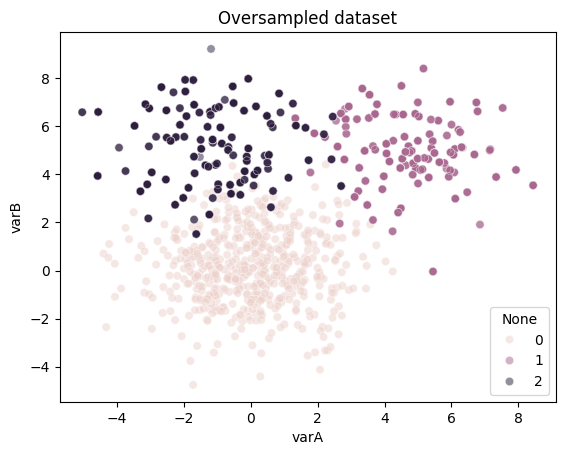

In [20]:
# plot of resampled data
sns.scatterplot(
    data=X_res, x='varA', y='varB', hue=y_res, alpha=0.5,
)

plt.title('Oversampled dataset')
plt.show()

In [22]:
y_res.value_counts()

0    534
1    534
2    534
Name: count, dtype: int64

In [23]:
# option 2: specify which classes to oversample
ros = RandomOverSampler(
    sampling_strategy={1:500, 2:500},   # we specify what to oversample
    random_state=0,
)

X_res, y_res = ros.fit_resample(X, y)

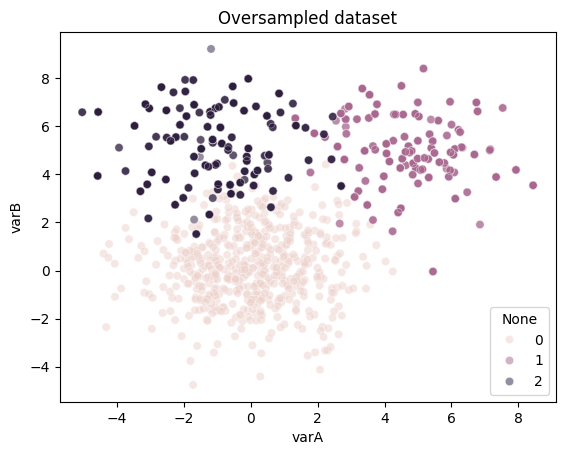

In [24]:
# plot of resampled data
sns.scatterplot(
    data=X_res, x='varA', y='varB', hue=y_res, alpha=0.5,
)

plt.title('Oversampled dataset')
plt.show()

In [25]:
y_res.value_counts()

0    534
1    500
2    500
Name: count, dtype: int64